In [1]:
import numpy as np 
import corner as DFM
from pydl.pydlutils.spheregroup import spherematch
# -- local -- 
import env
import util as UT
from ChangTools.fitstables import mrdfits

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA data

In [3]:
gama = mrdfits(UT.dat_dir()+'InputCatA.fits')
specdata = mrdfits(UT.dat_dir()+'SpecLines.fits')

In [6]:
print 'colums in InputCatA.fits'
print gama.__dict__.keys()
print '========================'
print 'colums in SpecLines.fits'
print specdata.__dict__.keys()

colums in InputCatA.fits
['psfmag_r', 'modelmag_g', 'modelmag_i', 'modelmag_r', 'modelmag_u', 'modelmag_z', 'petror50_r', 'petromag_i', 'petror90_r', 'petromag_g', 'cataid', 'petromag_z', 'objid', 'petromag_r', 'petromag_u', 'ra', 'status', 'run', 'flags_r', 'primtarget', 'fibermag_r', 'flags', 'petrorad_r', 'extinction_r', 'dec']
colums in SpecLines.fits
['niiberr', 'oiiberr', 'oiiibsig', 'ioi6300err', 'ihderr', 'ioi6364', 'niibsig', 'img', 'oiirsigerr', 'iniiberr', 'inad', 'oiiir', 'oiirsig', 'z_helio', 'oiiib', 'is_sbest', 'inevrerr', 'specid', 'ioiiib', 'niirew', 'imgerr', 'niirerr', 'ioiiir', 'hbsigerr', 'haew', 'niibsigerr', 'ihberr', 'oiiirsig', 'isiib', 'oiiibew', 'oiierr', 'isiir', 'oiiiberr', 'siirsig', 'iniirerr', 'niirsigerr', 'ioi6300', 'ra', 'ioii', 'oiirerr', 'isiirerr', 'oiiibsigerr', 'hasig', 'dec', 'iniib', 'oiib', 'hberr', 'hbsig', 'oiir', 'oiirew', 'siib', 'siibsig', 'ioi6364err', 'ihb', 'iha', 'siir', 'ihd', 'haerr', 'ioiierr', 'niib', 'ihaerr', 'oiiirerr', 'inevbe

Read in legacy-survey data

In [4]:
legacy = mrdfits(UT.dat_dir()+'survey-bricks-dr5.fits.gz')
sweep = mrdfits(UT.dat_dir()+'sweep-210m005-220p000.fits')

In [8]:
print '> colums in survey-bricks-dr5.fits.gz'
print legacy.__dict__.keys()
print '========================'
print '> colums in sweep-210m005-220p000.fits'
print sweep.__dict__.keys()

> colums in survey-bricks-dr5.fits.gz
['ncomp', 'psfsize_z', 'ebv', 'ext_r', 'ext_z', 'wise_nobs', 'nexphist_g', 'ext_g', 'psfdepth_z', 'nexp', 'psfdepth_r', 'ra', 'nexphist_r', 'psfdepth_g', 'trans_wise', 'psfsize_r', 'nexphist_z', 'npsf', 'nexp_r', 'brickname', 'galdepth_r', 'nexp_z', 'ext_w4', 'ext_w3', 'ext_w2', 'galdepth_z', 'trans_g', 'nobjs', 'trans_z', 'galdepth_g', 'ext_w1', 'nexp_g', 'trans_r', 'nrex', 'psfsize_g', 'nsimp', 'dec', 'ndev']
> colums in sweep-210m005-220p000.fits
['allmask_r', 'allmask_u', 'allmask_y', 'allmask_z', 'allmask_g', 'allmask_i', 'flux_ivar_w2', 'flux_g', 'flux_ivar_w1', 'flux_ivar_w4', 'fracdev', 'flux_i', 'mw_transmission_w1', 'mw_transmission_w3', 'flux_u', 'flux_r', 'mw_transmission_w4', 'shapedev_r_ivar', 'flux_z', 'flux_y', 'rchisq_w3', 'rchisq_w2', 'rchisq_w1', 'rchisq_w4', 'flux_w2', 'flux_w3', 'flux_w1', 'flux_w4', 'brickid', 'dchisq', 'release', 'dec_ivar', 'flux_ivar_u', 'flux_ivar_r', 'psfsize_y', 'flux_ivar_z', 'flux_ivar_y', 'flux_ivar_g

Now lets match the GAMA photometry to GAMA spectra

In [9]:
match = spherematch(gama.ra, gama.dec, specdata.ra, specdata.dec, 0.000277778)

In [10]:
assert np.max(np.abs(gama.ra[match[0]]-specdata.ra[match[1]])) < 0.1

In [11]:
u_mag = gama.modelmag_u[match[0]]
g_mag = gama.modelmag_g[match[0]]
r_mag = gama.modelmag_r[match[0]]
i_mag = gama.modelmag_i[match[0]]
z_mag = gama.modelmag_z[match[0]]

In [12]:
halpha = specdata.ha[match[1]]
halpha_ew = specdata.haew[match[1]]

In [13]:
cuts = (halpha > -99.) & (u_mag > -9999.) & (g_mag > -9999.) & (r_mag > -9999.) & (i_mag > -9999.) & (z_mag > -9999.)

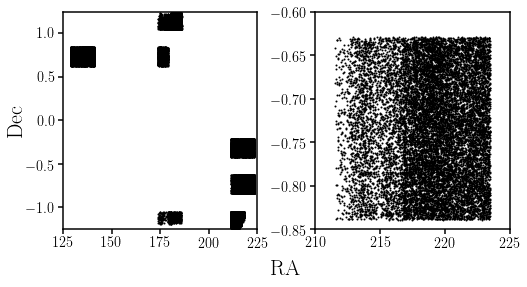

In [14]:
fig = plt.figure(figsize=(8,4))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=22)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=22)
sub = fig.add_subplot(121)
sub.scatter(gama.ra[match[0]], gama.dec[match[1]], c='k', s=1)
sub.set_xlim([125., 225])
sub.set_ylim([-1.25, 1.25])

sub = fig.add_subplot(122)
sub.scatter(gama.ra[match[0]], gama.dec[match[1]], c='k', s=1)
sub.set_xlim([210, 225])
sub.set_ylim([-0.85, -0.6])
fig.subplots_adjust(wspace=0.3)

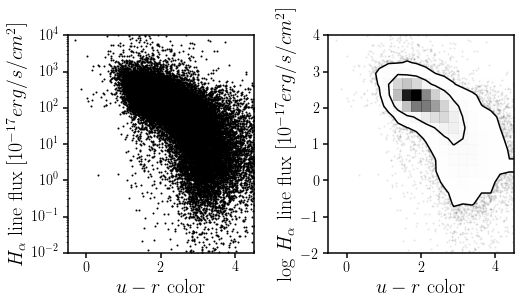

In [15]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(u_mag[cuts] - r_mag[cuts], halpha[cuts], c='k', s=1)
sub.set_xlim([-0.5, 4.5])
sub.set_xlabel('$u - r$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(u_mag[cuts] - r_mag[cuts], np.log10(halpha[cuts]), levels=[0.68, 0.95], range=[[-0.5, 4.5], [-2, 4]], ax=sub)
sub.set_xlabel('$u - r$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)

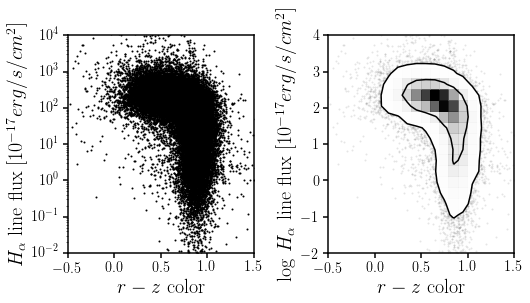

In [16]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(r_mag[cuts] - z_mag[cuts], halpha[cuts], c='k', s=1)
sub.set_xlim([-0.5, 1.5])
sub.set_xlabel('$r - z$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(r_mag[cuts] - z_mag[cuts], np.log10(halpha[cuts]), levels=[0.68, 0.95], range=[[-0.5, 1.5], [-2, 4]], ax=sub)
sub.set_xlabel('$r - z$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)

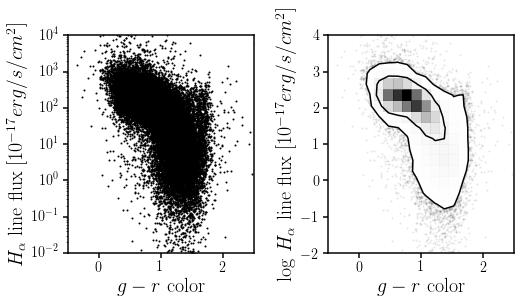

In [17]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(g_mag[cuts] - r_mag[cuts], halpha[cuts], c='k', s=1)
sub.set_xlim([-0.5, 2.5])
sub.set_xlabel('$g - r$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(g_mag[cuts] - r_mag[cuts], np.log10(halpha[cuts]), levels=[0.68, 0.95], range=[[-0.5, 2.5], [-2, 4]], ax=sub)
sub.set_xlabel('$g - r$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)

(-0.5, 1.5)

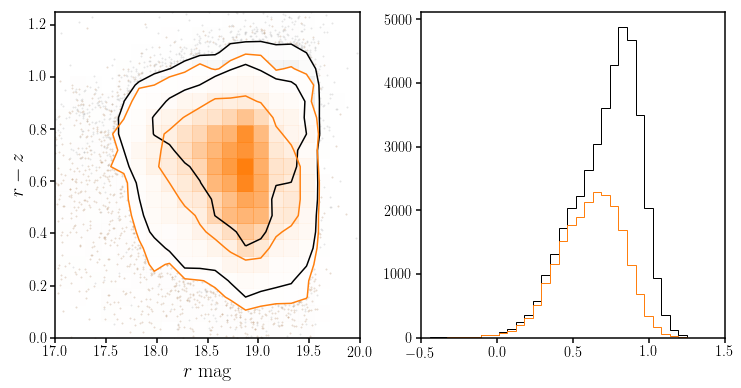

In [40]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
DFM.hist2d(r_mag[cuts], r_mag[cuts] - z_mag[cuts], levels=[0.68, 0.95], range=[[17,20], [0., 1.25]], 
           color='k', alpha=0.5, ax=sub)
#sub.scatter(r_mag[cuts], r_mag[cuts] - z_mag[cuts], c='k', s=1)
highha = cuts & (halpha > 100.)
DFM.hist2d(r_mag[highha], r_mag[highha] - z_mag[highha], levels=[0.68, 0.95], range=[[17,20], [0., 1.25]], 
           color='C1', alpha=0.5, ax=sub)

#sub.scatter(r_mag[highha], r_mag[highha] - z_mag[highha], c='r', s=1)
#highha = cuts & (halpha > 1000.)
#sub.scatter(r_mag[highha], r_mag[highha] - z_mag[highha], c='b', s=1)
sub.set_xlim([17, 20])
sub.set_xlabel('$r$ mag', fontsize=20)
sub.set_ylim([-0., 1.25])
sub.set_ylabel('$r-z$', fontsize=20)

sub = fig.add_subplot(122)
_ = sub.hist(r_mag[cuts] - z_mag[cuts], range=[-1., 1.25], color='k', bins=40, histtype='step')
_ = sub.hist(r_mag[highha] - z_mag[highha], range=[-1., 1.25], color='C1', bins=40, histtype='step')
sub.set_xlim([-0.5, 1.5])


In [97]:
print sweep.ra, sweep.dec

 [ 214.2328891   214.22321325  214.39589362 ...,  219.27523897  219.27075912
  219.29886954] [-6.62432803 -6.62477486 -6.61909661 ..., -7.62542116 -7.6250634
 -7.62514847]


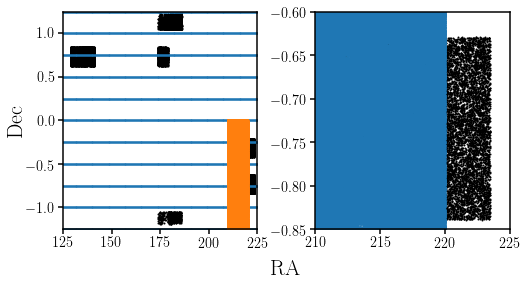

In [100]:
fig = plt.figure(figsize=(8,4))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=22)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=22)

sub = fig.add_subplot(121)
sub.scatter(gama.ra[match[0]], gama.dec[match[1]], c='k', s=1)
sub.scatter(legacy.ra, legacy.dec, s=1)
sub.scatter(sweep.ra, sweep.dec, s=1)
sub.set_xlim([125., 225])
sub.set_ylim([-1.25, 1.25])

sub = fig.add_subplot(122)
sub.scatter(gama.ra[match[0]], gama.dec[match[1]], c='k', s=1)
#sub.scatter(legacy.ra, legacy.dec, s=5)
sub.scatter(sweep.ra, sweep.dec, s=1)
sub.set_xlim([210, 225])
sub.set_ylim([-0.85, -0.6])
fig.subplots_adjust(wspace=0.3)

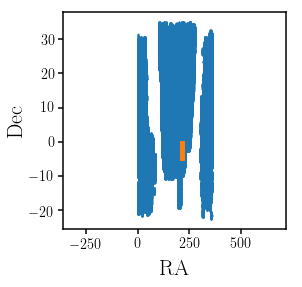

In [102]:
fig = plt.figure(figsize=(4,4))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=22)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=22)

sub = fig.add_subplot(111)
sub.scatter(gama.ra[match[0]], gama.dec[match[1]], c='k', s=1)
sub.scatter(legacy.ra, legacy.dec, s=1)
sub.scatter(sweep.ra, sweep.dec, s=1)